In [ ]:
# A custom dataset is a collection of data relating to a specific problem you're working on.

##0. Importing PyTorch and setting up device-agnostic code

In [ ]:
import torch
from torch import nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

##1. Get Data

Our dataset is a subset of the Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class (750 training, 250 testing).

Our dataset starts with 3 classes of food and only 10% of the images (~75 training, ~25 testing).

Why do this?

When starting out ML projects, it's important to try things on small scale then increase the scale when necessary.

The whole point is to speed up how fast you can experiment.

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder does'nt exist, download it and preapre it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} Directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)


    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data")
        f.write(request.content)


    # Unzip pizza, steak, sushi_data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("unzippig pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi Directory, creating one...
unzippig pizza, steak, sushi data...


##2. Become one with the data (data preparation)

we'll walk through the data using `os.walk` python build in function.

In [ ]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directiories and {len(filenames)} images in {dirpath}")

In [ ]:
walk_through_dir(image_path)

There are 2 directiories and 0 images in data/pizza_steak_sushi
There are 3 directiories and 0 images in data/pizza_steak_sushi/test
There are 0 directiories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directiories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directiories and 25 images in data/pizza_steak_sushi/test/pizza
There are 3 directiories and 0 images in data/pizza_steak_sushi/train
There are 0 directiories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directiories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directiories and 78 images in data/pizza_steak_sushi/train/pizza


In [ ]:
# Setup train and testing path
train_dir = image_path/ "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

###2.1 Visualize an image

1. Get all the images path using `pathlib.Path.glob()` to find all the files ending in `.jpg`

2. Pick a random image using Python's `random.choice()`

3. Get the image class using `pathlib.Path.parent.stem`.

4. We'll open the random image path using `PIL.Image.open()` (PIL - Python Image Library)

5. We'll show the image and print metadata.

Random Image path: data/pizza_steak_sushi/test/pizza/2019408.jpg
Image class: pizza
Image height: 512
Image width: 512


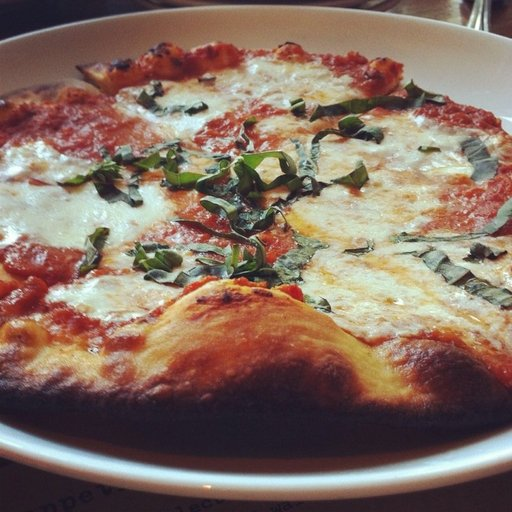

In [ ]:
import random
from PIL import Image

# set seed
random.seed(42)

#1. Get all the image paths (* - any combination)
image_path_list = list(image_path.glob("*/*/*.jpg"))

#2. Get random image path
random_image_path = random.choice(image_path_list)

# Get the clas from path name ( the image class is the name of directory where the image is stored)
image_class = random_image_path.parent.stem

# Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random Image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

##### Visualizing an Image using Matplotlib - Type 1

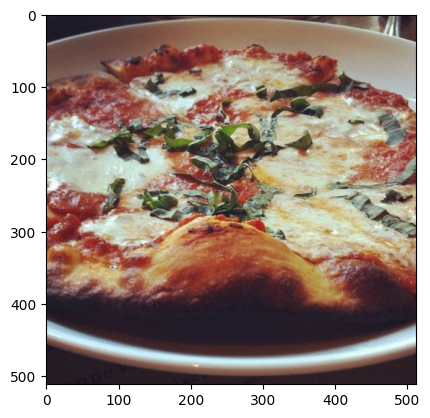

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


imgg = mpimg.imread(random_image_path)
plt.imshow(imgg)

#### Visualizing an Image using Matplotlib  - Type 2

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

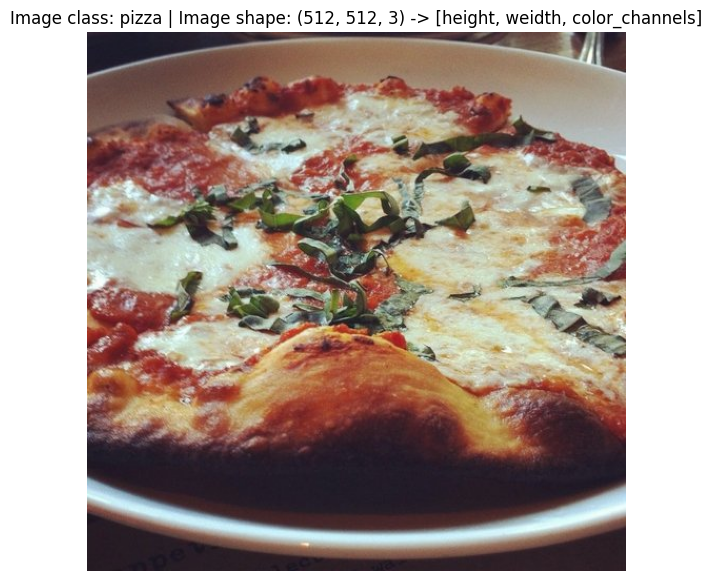

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn img into an array
img_as_array = np.asarray(img)

# Plot the image using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, weidth, color_channels]")
plt.axis(False)

###3. Transforming data

1. Turn it into tensors (numerical representations of our images)

2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `Dataset` and `DataLoader` for short.

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

###3.1 Transforming data with `torchvision.transforms`

transforms help you get your images ready to be used with the model/perform data augmentation.

In [ ]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into torch.Tensor
    transforms.ToTensor() # this also converts all pixel values to 0 to 25 to be between 0.0 and 1.0
])

In [ ]:
data_transform(img)

tensor([[[0.1412, 0.1373, 0.1294,  ..., 0.2235, 0.1490, 0.2235],
         [0.1176, 0.1137, 0.1137,  ..., 0.2471, 0.1961, 0.2706],
         [0.1137, 0.1137, 0.1098,  ..., 0.3020, 0.2627, 0.3020],
         ...,
         [0.1490, 0.1490, 0.1451,  ..., 0.1686, 0.1647, 0.1647],
         [0.1451, 0.1451, 0.1490,  ..., 0.1686, 0.1686, 0.1725],
         [0.1451, 0.1451, 0.1490,  ..., 0.1725, 0.1765, 0.1765]],

        [[0.1216, 0.1176, 0.1137,  ..., 0.1961, 0.1176, 0.1647],
         [0.1098, 0.1059, 0.1059,  ..., 0.2157, 0.1333, 0.1843],
         [0.1020, 0.1020, 0.1059,  ..., 0.2471, 0.1765, 0.2000],
         ...,
         [0.1059, 0.1020, 0.1059,  ..., 0.1216, 0.1176, 0.1216],
         [0.1059, 0.1059, 0.1059,  ..., 0.1216, 0.1216, 0.1216],
         [0.1059, 0.1059, 0.1098,  ..., 0.1176, 0.1216, 0.1216]],

        [[0.1765, 0.1686, 0.1647,  ..., 0.2392, 0.1647, 0.1961],
         [0.1647, 0.1608, 0.1608,  ..., 0.2431, 0.1647, 0.1922],
         [0.1647, 0.1608, 0.1608,  ..., 0.2667, 0.1882, 0.

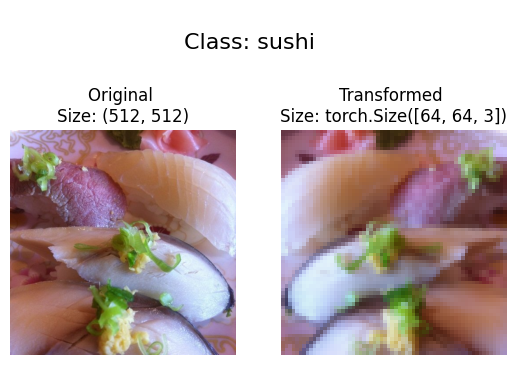

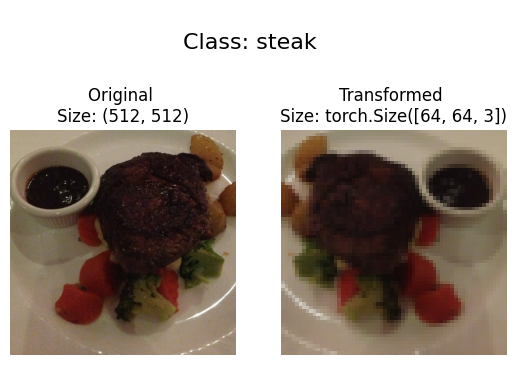

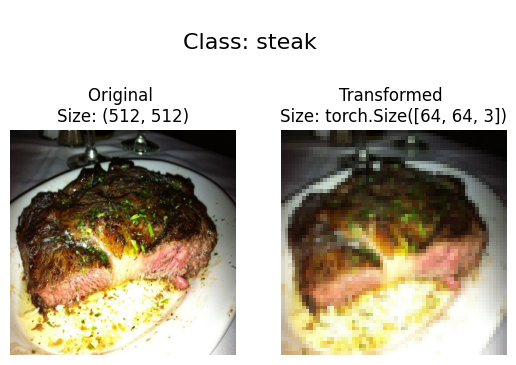

In [ ]:
def plot_transformed_images(image_paths:list,
                            transform,
                            n=3,
                            seed=None):
    """
    Select random images from a path of images and loads/transforms them,
    then plots the original vs the transformed version.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot the image
            # .permute() will will change the shape of image to suit matplotlib
            # Default pytorch is [C, H, W] -> matplotlib [H, W, C]
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"\nClass: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, data_transform, n=3)

##4 Option1: Loading Image Data Using `ImageFolder`

 - Turn Images into `Dataset` capable of being used with Pytorch

 - Since our data is standard image classification format, we will ues the class `torchvision.datasets.ImageFolder`.

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None # transforms to perform on labels (if necessary)
                                  )

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data: \n{train_data}\nTest data:\n{test_data}")

Train data: 
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
# Get classes names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the length
len(train_data), len(test_data)

(225, 75)

In [ ]:
img, label = train_data[0][0], test_data[0][1]
print(f"Image tensor: \n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor: 
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

#### Plot a single image using matplotlib

Original Shape: torch.Size([3, 64, 64]) [color_channels, height, width]
Afer Image get Permutted: torch.Size([64, 64, 3]) [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

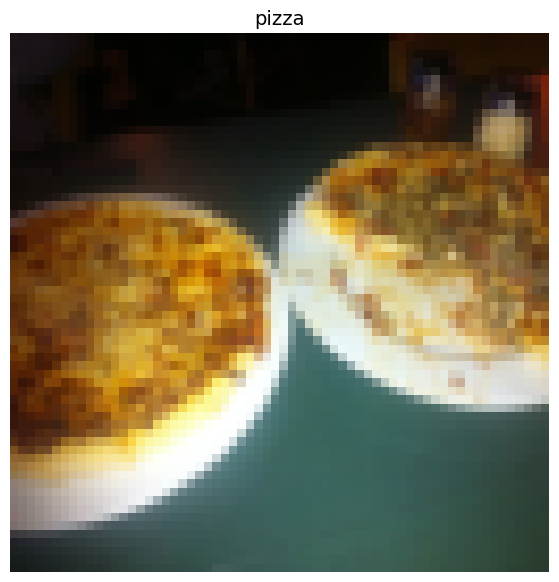

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original Shape: {img.shape} [color_channels, height, width]")
print(f"Afer Image get Permutted: {img_permute.shape} [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14)

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
os.cpu_count()

2

In [ ]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how manu subprocesses/ cpu cores to use for data loading? (higher=more)
                              shuffle=True)

test_dataloader = DataLoader(dataset=train_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=True) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c4d971be590>,
 <torch.utils.data.dataloader.DataLoader at 0x7c4d9709ad10>)

In [ ]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


##5 Option 2: Loading Image Data with a Custom `Dataset`

1. Want to be able to load images from file
2. Want to be able to get class names from the dataset
3. Want to be able to get classes as dictionary from the Dataset

Pros:
 - can create a `Dataset` out of almost anything
 - Not limited to PyTorch pre-built `Dataset` functions

Cons:
 - Even though you could create `Dataset` out of almost anything, it doesn't mean it work ...
 - Using a custom `Dataset` often results in us writing more code,which could be prone to errors or performance issues

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

###5.1 Creating a helper function to get class names

1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format.)

2. Raise and error if the class names aren't found (if this happens, there might be something woring with the directory structure.)

3. Turn the class names into a directory and List.

In [ ]:
# Setup the path for target direcory
target_directory = train_dir
print(f"target directory: {target_directory}")

# Get the classses names from target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

target directory: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
# Make the function to find classes in the target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """
    Finds the class folder names in a target directory.
    """


    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names are not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}....")

    # Create a directory of index labels
    class_to_idx = {cls_name:i for i, cls_name in enumerate(classes)}

    return classes, class_to_idx

In [ ]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

###5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create our own custom dataset, we wnat to:

1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
 - path  - path to our images
 - transform - the transform we'd like to use
 - classes - a list of target classes
 - class_to_idx = a dict of the target classes mapped to integer labels

4. Create a function to `load_images()`, this function will open an image
5. Overwrites the `__len__()` method to return the length of our dataset
6. Overwrites the `__getitem__()` method to return a given sample when passed an index
                                                                       

In [ ]:
# Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.data.utils.Dataset:
class ImageFolderCustom(Dataset):

    # 2. Initialize with targ_dir and transform
    def __init__(self, targ_dir:str, transform=None) -> None:

        # 3.Create class attribute
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # update this accordinly to .jpeg or .png
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_inx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index:int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrites the __len__() method
    def __len__(self) -> int:
        "Returns the total number of samples"
        return len(self.paths)

    # 6. Overwrites the __getitem__() method
    def __getitem__(self, index:int) -> Tuple[torch.tensor, int]:
        "Returns one sample of data, data and label (X, y)"
        img = self.load_image(index)
        class_name = self.paths[index].parent.name #expects path in data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label(X, y)
        else:
            return img, class_idx # return data, label(X, y)

In [ ]:
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5)
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                               transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7c4e81277790>,
 <__main__.ImageFolderCustom at 0x7c4d972f41d0>)

In [ ]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

###5.3 Create a function to display random images

1. Take in a Dataset and a number of other patameters such as class names and how many. images to visualize.
2. To prevent display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility.
4. Get a list of random sample indexes from the target dataset.
5. Set a matplotlib plot
6. Loop through the random images and plot them with matplotlib
7. Make sure the dimensions of our images line up with matplotlib (HWC)


In [ ]:
#1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust the display if n is too high
    if n>10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. set random seed
    if seed:
        random.seed(42)

    # 4. Get random samples indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [C, H, W] -> [H, W, C]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis(False)
        if classes:
            title=f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

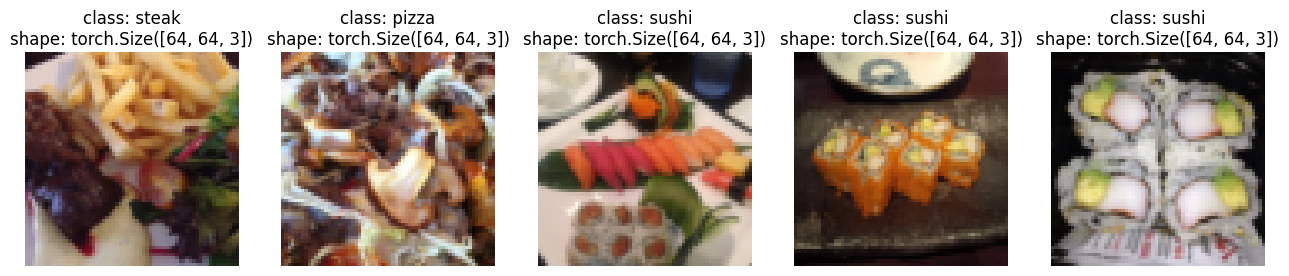

In [ ]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


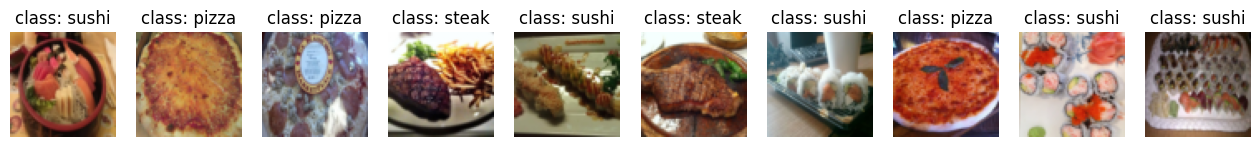

In [ ]:
# Display randmo images from ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=12,
                      classes=class_names,
                      seed=None)

In [ ]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=1,
                                     num_workers=0, # subprocess/ no of cpu cores
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=1,
                                    num_workers=0,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7c4d96edf1d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c4d96d47a10>)

In [ ]:
# Get image and label from custom DataLoader
img_custom,  label_custom = next(iter(train_dataloader_custom))

print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, widht]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, widht]
Label shape: torch.Size([1])


##6. Other forms of transforms (Data Augmentation)

Data augmentation is the process of artificially addding diversity to your training data.

In the case of image data, this may mean applying various image transformations to the training images.

This practice hopefully results in a model that's more generalizable to unseen data.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models to the state of the art levels...



In [ ]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense: 0 being no range and 31 being maximum range
    transforms.ToTensor() # Convert into 0 to 1
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

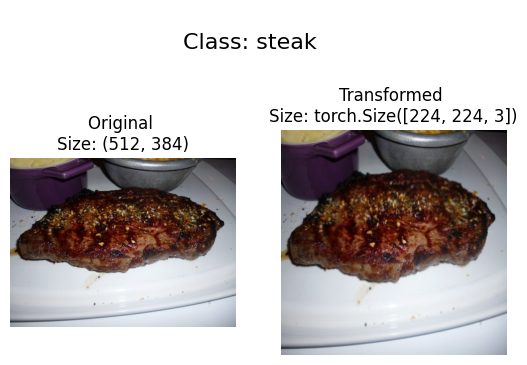

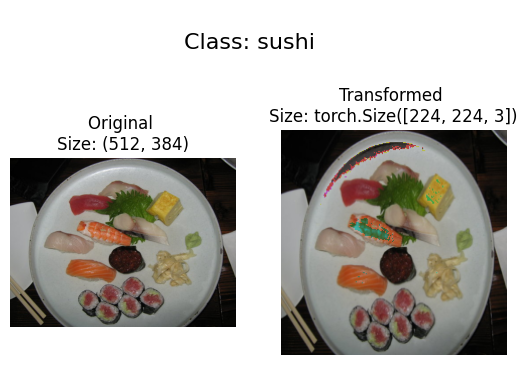

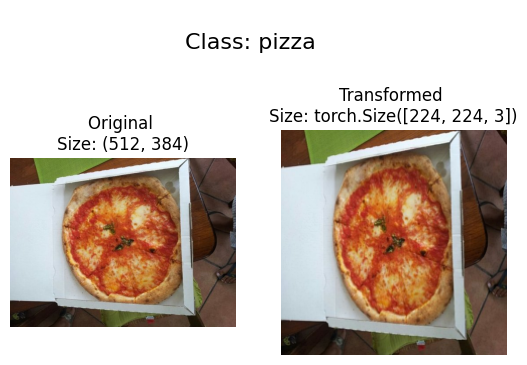

In [ ]:
# Get all image paths
image_paths_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

##7. Model 0:TinyVGG without data augmentation

###7.1 Creating transforms and loading data for Model 0



In [ ]:
# Create simple transforms
simple_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

1. Load the data, turning each of our training and test folders into a `Dataset` with `torchvision.datasets.ImageFolder()`

2. Then into a `Dataloder` using `torch.utils.data.DataLoader()`.

In [ ]:
# 1. Load and transform data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transforms)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transforms)

# Turn data into DataLoader
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE= 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers")

# Create DataLoder's

train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers


(<torch.utils.data.dataloader.DataLoader at 0x7c4d96cd1450>,
 <torch.utils.data.dataloader.DataLoader at 0x7c4d96b33c90>)

### 7.2 Create TinyVGG model class

In [ ]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG
    """
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int)->None:

        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # the square going over the image
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel size

        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 16 * 16, # <- This is a trick explanation given below
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(f"Conv block 1: {x}")
        x = self.conv_block_2(x)
        # print(f"Conv block 2: {x}")
        x = self.classifier(x)
        # print(f"classifier: {x}")
        return x
        # return(self.classifier(self.conv_block_2(self.conv_block_1(x)))) # <- this leverage the benfit of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes),
                  ).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
## Try this without setting any value in our case (16*16)
## Then this error: mat1 and mat2 shapes cannot be multiplied (1x2560 and 10x3)
## 2560 is : 10*16*16

# image = train_data[0][0]
# model_0(image.unsqueeze(0).to(device))

**Note**: One of the ways to speed up deep learning models computing on a GPU is to leverage operator fusion.

This means in the `forward()` method in our model above, instead of calling a layer block and reassigning x every time, we call each block in succession (see the final line of the `forward()` method in the model above for an example).

This saves the time spent reassigning x (memory heavy) and focuses on only computing on x.

###7.3 Try a forward pass on a single image (to test the model)



In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get the single image from the batch and unsqueeze() the image so it has a batch size of 1.
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits: \n{pred}\n")
print(f"Output prediction probabilities: \n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label: \n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits: 
tensor([[0.0578, 0.0634, 0.0351]])

Output prediction probabilities: 
tensor([[0.3352, 0.3371, 0.3277]])

Output prediction label: 
tensor([1])

Actual label:
2


###7.3 Use `torchinfo` to get and idea of the shapes going through our model

- `torchinfo` is used to get the information about the model

- `torchinfo` comes with a `summary()` method that takes a PyTorch model as well as an `input_shape` and returns what happens as a tensor moves through our model.

In [ ]:
# Install torchinfo if it's not available, import it if it is

try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

In [ ]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

#7.5 Create train & test loop functions

Functionalize the training and testing loop

1. `train_step()` - takes in a model, a `DataLoader`, a loss function and an optimizer and trains the model on the `DataLoader`.

2. `test_step()` - takes in a model, a `DataLoader` and a loss function and evaluates the model on the `DataLoader`.

3. `train()` - performs 1. and 2. together for a given number of epochs and returns a result dictionary

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

    # Put the model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward Pass
        y_pred = model(X)

        # 2. Calculate and accumaulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate acuuarcy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrices to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

1.` torch.softmax(y_pred, dim=1)`
Applies softmax across each row (i.e., across classes) of y_pred:

y_pred is the raw output (logits) from the model.

Softmax converts logits into probabilities.

2. `torch.argmax(..., dim=1)`
Selects the class with the highest probability for each example in the batch.

→ So y_pred_class is a tensor of predicted class labels (integers), e.g., [2, 0, 1, 1].

3. `(y_pred_class == y)`
Compares predicted labels to true labels (y), returning a tensor of booleans:

[True, False, True, True]

4. `.sum().item()`
Counts how many predictions were correct (i.e., number of True values) and converts to a Python number.

5. `/ len(y_pred)`
Divides the number of correct predictions by the batch size to get batch accuracy (a float between 0 and 1).

6. `train_acc += ...`
Accumulates batch accuracy over all batches.

Example:
Let’s say for a batch of size 5:

y = [0, 2, 1, 1, 0]

y_pred_class = [0, 1, 1, 1, 2]

Correct predictions: positions 0, 2, 3 → 3 out of 5 correct → batch accuracy = 3/5 = 0.6

So train_acc += 0.6.




`.item()` is a method used to extract the Python scalar value (like a float or int) from a single-element PyTorch tensor.

Example:

import torch

x = torch.tensor([3.14])
print(x)         # tensor([3.1400])
print(x.item())  # 3.14 (Python float)

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss , test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X , y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate loss and accumates loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

        # Adjust metrics to get averge loss and accuracy per batch
        test_loss = test_loss / len(dataloader)
        test_loss = test_loss / len(dataloader)
        return test_loss, test_acc

###7.6  Creating a `train()` function to combine `train_step()` and `test_step()`

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
          epochs:int=5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
               }

    # 3. Loop througn training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} |"
            f"train_loss: {train_loss:.4f} |"
            f"train_acc: {train_acc:.4f} |"
            f"test_loss: {test_loss:.4f} |"
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update dictionary results
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss) # if the train_loss is instance of torch.Tensor then convert the train_loss into specific item, same for below
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

### 7.7 Train and Evaluate Model 0


In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of colour channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss fn and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train_model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 |train_loss: 1.1078 |train_acc: 0.2578 |test_loss: 0.3787 |test_acc: 0.7812
Epoch: 2 |train_loss: 1.0846 |train_acc: 0.4258 |test_loss: 0.3874 |test_acc: 0.5938
Epoch: 3 |train_loss: 1.1153 |train_acc: 0.2930 |test_loss: 0.3898 |test_acc: 0.5938
Epoch: 4 |train_loss: 1.0990 |train_acc: 0.2891 |test_loss: 0.3781 |test_acc: 0.5938
Epoch: 5 |train_loss: 1.0990 |train_acc: 0.2930 |test_loss: 0.3811 |test_acc: 0.5938
Total training time: 17.521 seconds


In [ ]:
model_0_results

{'train_loss': [1.1078356951475143,
  1.0846453607082367,
  1.1152610331773758,
  1.0990152657032013,
  1.0989657938480377],
 'train_acc': [0.2578125, 0.42578125, 0.29296875, 0.2890625, 0.29296875],
 'test_loss': [0.37873583369784886,
  0.38739025592803955,
  0.389829609129164,
  0.3781005011664496,
  0.38114155663384336],
 'test_acc': [0.78125, 0.59375, 0.59375, 0.59375, 0.59375]}

###7.8 Plot the loss curves of model_0

**Loss Curves** show the model's results over time.

In [ ]:
# Check the model_0_results key
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

We'll need to extract each of these keys and turn them into a plot.

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary"""

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out no of epochs
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

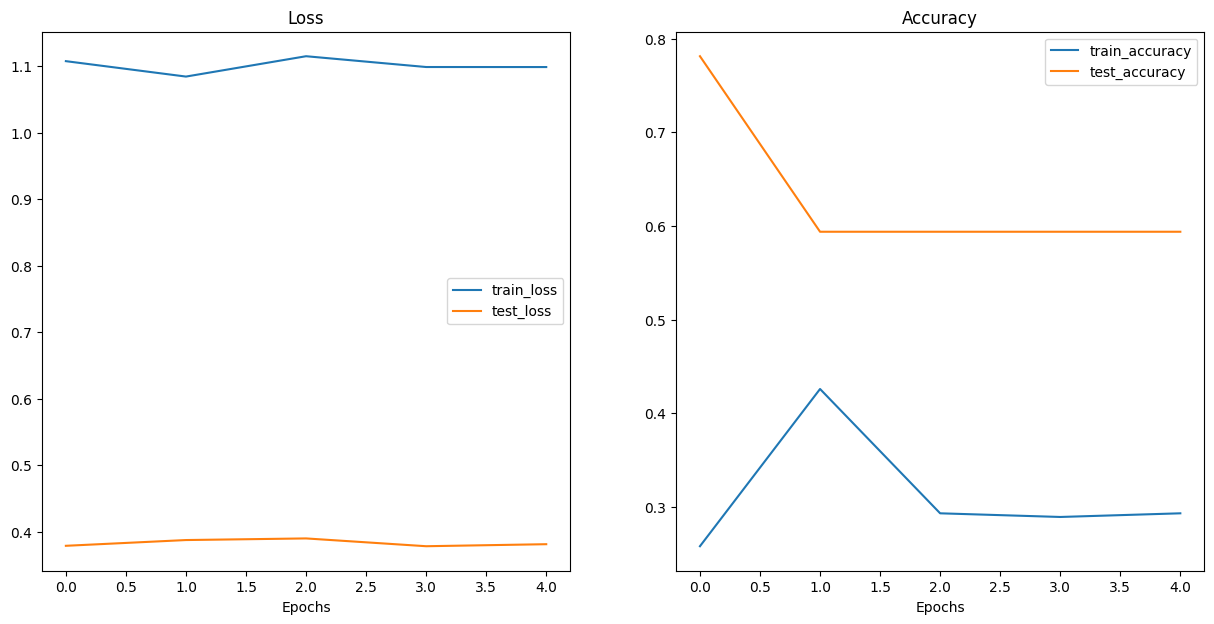

In [ ]:
plot_loss_curves(model_0_results)

##8. What should an ideal loss curve look like?

- 8.1 How to deal with overfitting
- 8.2 How to deal with underfitting
- 8.3 Balance betweeen underfitting and overfitting

##9.Model 1: TinyVGG with Data Augmentation

### Create transform with data augmentation

In [ ]:
# Create training trnsform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

###9.2 Create train and test `Dataset's` and `DataLoader's`

In [ ]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
# Turn the Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_augmented = DataLoader(test_data_simple,
                                       batch_size=BATCH_SIZE,
                                       shuffle=False,
                                       num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7c4d96eed850>,
 <torch.utils.data.dataloader.DataLoader at 0x7c4d96b33c90>)

###9.3 Construct and train Model 1


In [ ]:
# Create model_1 and sent it to target deivce
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)
).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

Train model 1

In [ ]:
# set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# end time
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 |train_loss: 1.1076 |train_acc: 0.2500 |test_loss: 0.3687 |test_acc: 0.7812
Epoch: 2 |train_loss: 1.0791 |train_acc: 0.4258 |test_loss: 0.3796 |test_acc: 0.7812
Epoch: 3 |train_loss: 1.0810 |train_acc: 0.4258 |test_loss: 0.3899 |test_acc: 0.7812
Epoch: 4 |train_loss: 1.1292 |train_acc: 0.3047 |test_loss: 0.3875 |test_acc: 0.7812
Epoch: 5 |train_loss: 1.0899 |train_acc: 0.4258 |test_loss: 0.3827 |test_acc: 0.7812
Total training time: 18.980 seconds


###9.4 Plot the loss Curves of Model 1

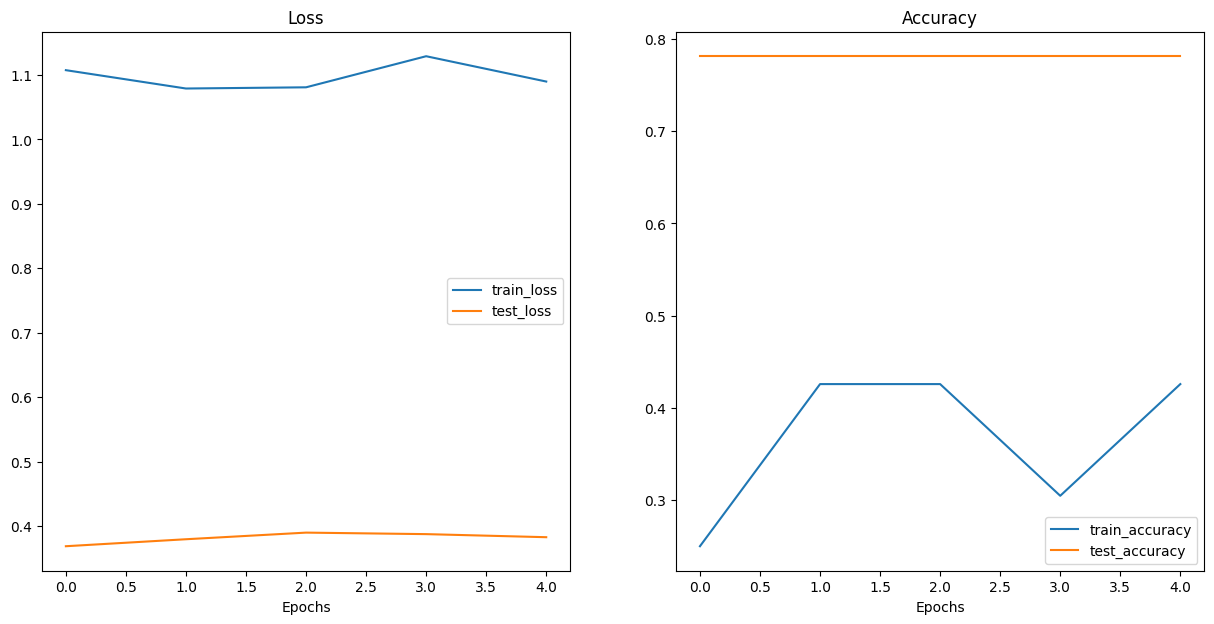

In [ ]:
plot_loss_curves(model_1_results)

##10. Compare model results

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.107836,0.257812,0.378736,0.78125
1,1.084645,0.425781,0.387390,0.59375
2,1.115261,0.292969,0.389830,0.59375
3,1.099015,0.289062,0.378101,0.59375
4,1.098966,0.292969,0.381142,0.59375


`model_0_results`, `model_1_results` are converted into pd df now we can plot using matplolib

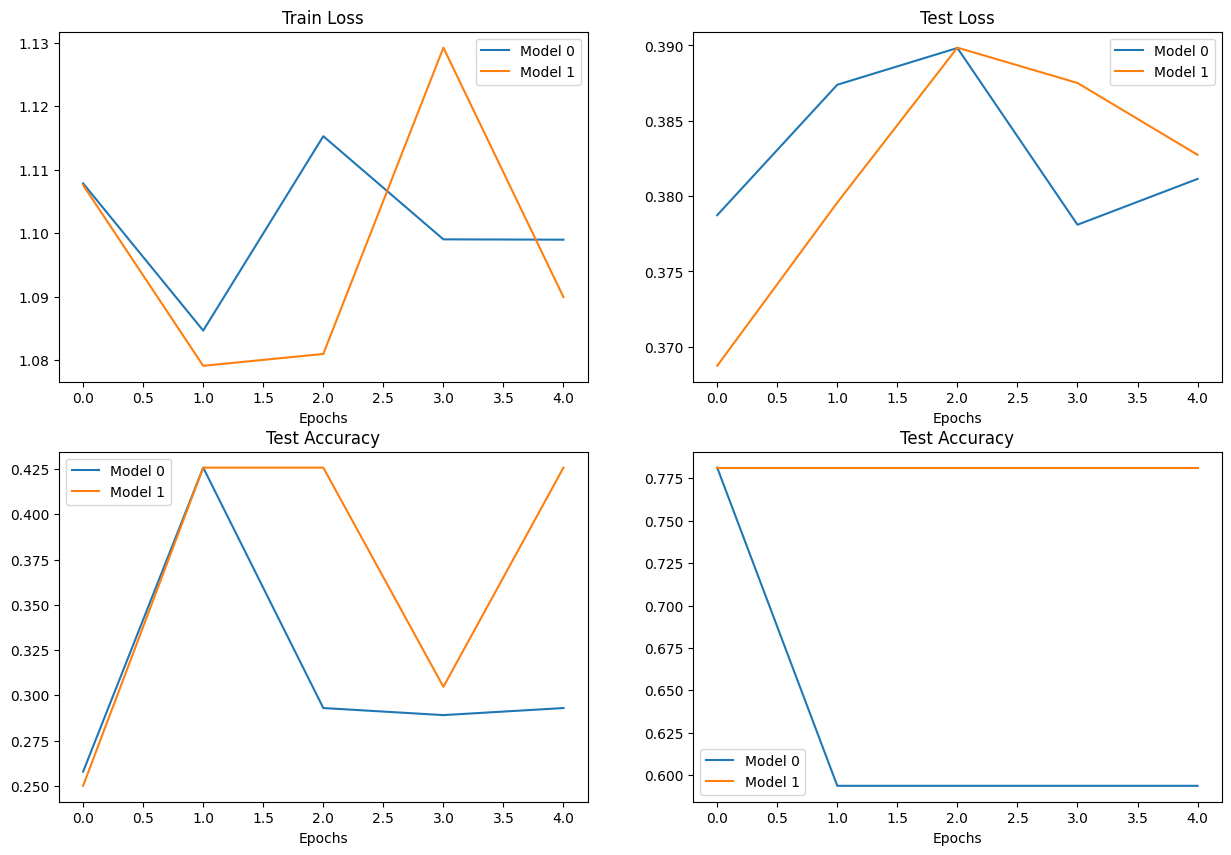

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train acc
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test acc
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

##11. Make a prediction on a custom image

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

###11.1 Loading in a custom image with PyTorch

PyTorch's `torchvision` has several input and output methods for reading and writing images and videos in `torchvision.io`

Since we want to load in an image, we'll use `torchvision.io.read_image()`.

This method will read a JPEG or PNG image and turn it into a 3 dimensional RGB or grayscale torch.Tensor with values of datatype `uint8` in range `[0, 255]`.

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n {custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])
Custom image dty

Our custom_image tensor is of datatype torch.uint8 and its values are between [0, 255].

But our model takes image tensors of datatype torch.float32 and with values between [0, 1].

So before we use our custom image with our model, **we'll need to convert it to the same format as the data our model is trained on**.

In [ ]:
# Try to make a predicition on image in uint8 format (this will error)
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

###11.2 Prediciting on custom images with trained PyTorch model

Our model was trained on images with shape `[3, 64, 64]`, whereas our custom image is currently `[3, 4032, 3024]`.

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

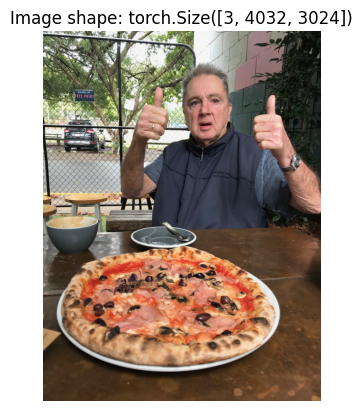

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0))  # [C, H, W] -> [H, W, C]
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False)

In [ ]:
# Create transform pipeline to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64))
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image).unsqueeze(dim=0).to(device)

# Print out original and new shape
print(f"Original Shape: {custom_image.shape}")
print(f"New Shape: {custom_image_transformed.shape}")

Original Shape: torch.Size([3, 4032, 3024])
New Shape: torch.Size([1, 3, 64, 64])


**Note**: What we've just gone through are three of the classical and most common deep learning and PyTorch issues:

1. Wrong datatypes - our model expects torch.float32 where our original custom image was uint8.
2. Wrong device - our model was on the target device (in our case, the GPU) whereas our target data hadn't been moved to the target device yet.
3. Wrong shapes - our model expected an input image of shape [N, C, H, W] or [batch_size, color_channels, height, width] whereas our custom image tensor was of shape [color_channels, height, width].
Keep in mind, these errors aren't just for predicting on custom images.

They will be present with almost every kind of data type (text, audio, structured data) and problem you work with.

In [ ]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed)

In [ ]:
custom_image_pred

tensor([[ 0.1188,  0.0339, -0.1486]])

Let's convert them from `logits -> prediciton probabilities -> predicition labels`.

In [ ]:
print(f"Predicition logits: {custom_image_pred}\n")

custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction Probabilies: {custom_image_pred_probs}\n")

custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Predicition logits: tensor([[ 0.1188,  0.0339, -0.1486]])

Prediction Probabilies: tensor([[0.3726, 0.3422, 0.2852]])

Prediction label: tensor([0])


In [ ]:
# Find the prediction label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()]
custom_image_pred_class

'pizza'

###11.3 Putting custom image prediciton together: building a function

1. Takes in a target image path and converts to the right datatype for our model (torch.float32).
2. Makes sure the target image pixel values are in the range [0, 1].
3. Transforms the target image if necessary.
4. Makes sure the model is on the target device.
5. Makes a prediction on the target image with a trained model (ensuring the image is the right size and on the same device as the model).
6. Converts the model's output logits to prediction probabilities.
7. Converts the prediction probabilities to prediction labels.
8. Plots the target image alongside the model prediction and prediction probability.


In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a predicition on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between[0 ,1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on target device
    model.to(device)

    # 5. Turn on Model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a predicition on image with extra dimension and send it to target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert predicition probabilies -> prediction labels
    target_image_label = torch.argmax(target_image_pred_probs, dim=1)

    #8. Plot the image alongside with predicition and prediction probs
    plt.imshow(target_image.squeeze().permute(1, 2, 0))  #[C, H, W] -> [H, W, C]
    if class_names:
        title=f"Pred: {class_names[target_image_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);


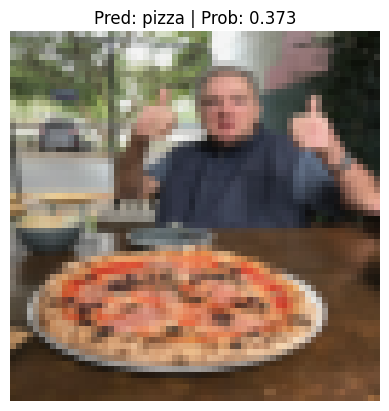

In [ ]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

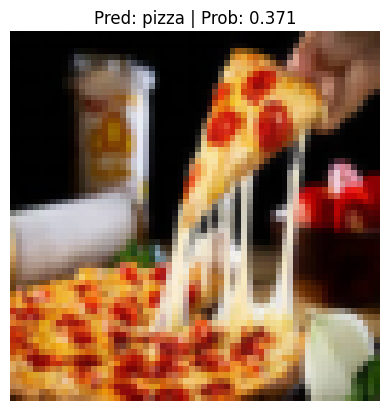

In [ ]:
arr = ["/content/p3.jpeg", "/content/p4.jpeg", "/content/pizza.jpeg", "/content/pizza2.jpeg", "/content/ppp.jpg", "/content/s.webp", "/content/s1.jpg" ]

pred_and_plot_image(model=model_1,
                    image_path=arr[2],
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)